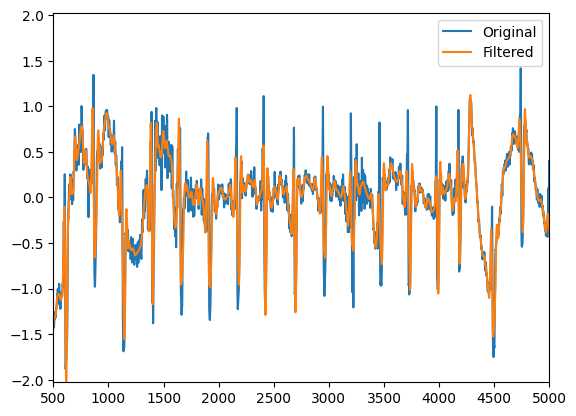

In [70]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import filtfilt, butter, iirnotch, lfilter, medfilt
from statistics import median

# Load ECG signal
ecg_signal_list = np.loadtxt('118e00.csv')

window_size = 101


#ecg_signal_list = ecg_signal_list[20000:25000]
ecg_signal = np.array(ecg_signal_list)
ecg_signal = apply_high_pass_filter(ecg_signal, 0.5, 360)
#ecg_signal = ecg_signal - medfilt(ecg_signal_list, 361)
# Define wavelet and level of decomposition
wavelet = 'db4'
level = 4

# Perform wavelet decomposition
coeffs = pywt.wavedec(ecg_signal, wavelet, level=level)
# Define threshold for filtering
'''
coeffs_filtered = []
for i, coeff_level in enumerate(coeffs):
    if i>1:
        coeffs_filtered.append(np.zeros(len(coeff_level)))
    else:
        sigma = median(coeff_level)/0.6745
        threshhold = sigma*np.sqrt(2*np.log(len(coeff_level)))
        new_coeff = pywt.threshold(coeff_level, threshhold, mode='soft')
        coeffs_filtered.append(new_coeff)'''

# Define threshold for filtering

coeffs_filtered = []
for id, c in enumerate(coeffs):
    if id<1:
        coeffs_filtered.append(np.array(c))
    else:
        coeffs_filtered.append(np.zeros(len(c)))  

#threshold = 0.1 * np.max(abs(coeffs[1]))
#pywt.threshold(c, threshold, mode='hard')

# Reconstruct filtered signal
ecg_filtered = pywt.waverec(coeffs_filtered, wavelet)
# Plot original and filtered signals

coeffs_filtered2 = []
for id, c in enumerate(coeffs):
    if id<2:
        coeffs_filtered2.append(np.array(c))
    else:
        coeffs_filtered2.append(np.zeros(len(c)))  

#threshold = 0.1 * np.max(abs(coeffs[1]))
#pywt.threshold(c, threshold, mode='hard')

# Reconstruct filtered signal
ecg_filtered2 = pywt.waverec(coeffs_filtered2, wavelet)
# Plot original and filtered signals


import matplotlib.pyplot as plt
plt.plot(ecg_signal, label='Original')
plt.plot(ecg_filtered, label='Filtered')
#plt.plot(ecg_filtered2, label='Filtered2')
xlim1 = 500
xlim2 = 5000
plt.xlim(xlim1,xlim2)
ylim = np.max(abs(ecg_filtered[xlim1:xlim2]))
plt.ylim(-ylim, ylim)
plt.legend()
plt.show()

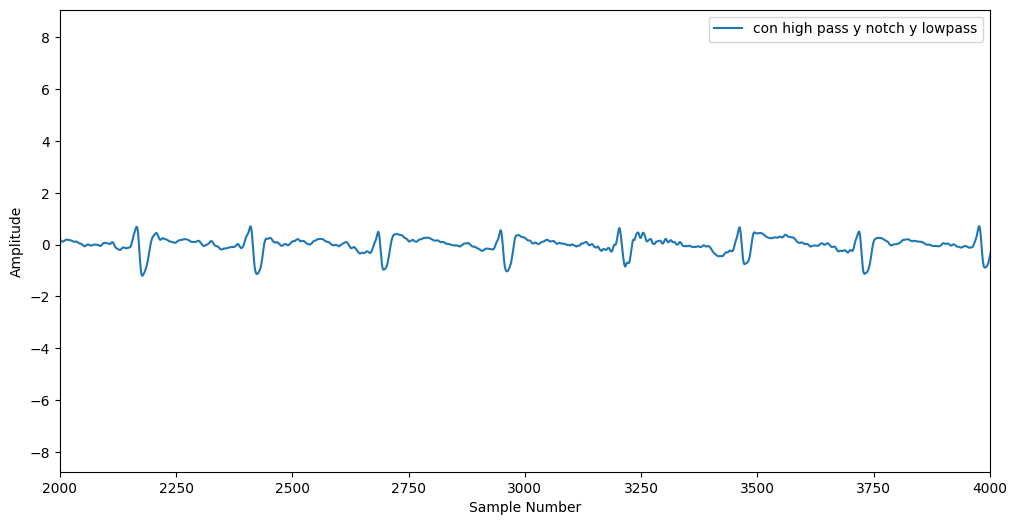

In [10]:
ecg = np.loadtxt('118e00.csv')

def apply_high_pass_filter(signal, cutoff_freq, sampling_freq):
    nyquist_freq = 0.5 * sampling_freq
    normalized_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(4, normalized_cutoff, btype='high', analog=False, output='ba')
    filtered_signal = lfilter(b, a, signal)
    return filtered_signal

def apply_notch_filter(signal, notch_freq, sampling_freq, Q=30.0):
    nyquist_freq = 0.5 * sampling_freq
    normalized_notch = notch_freq / nyquist_freq
    b, a = iirnotch(normalized_notch, Q)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

def apply_custom_filter(signal):
    a = [1,-1]
    b = [1/8, 0, 0, 0, 0, 0, 0, 0, -1/8]
    filtered_signal = lfilter(b, a, signal)
    return filtered_signal


# Preprocesar segun paper de 11 pags
fs = 360

plt.figure(figsize=(12, 6))
#plt.plot(ecg, label='ECG')
besaline_wander_filtered_signal = apply_high_pass_filter(ecg, 0.8, fs)
#plt.plot(besaline_wander_filtered_signal, label='con high pass')
powerline_filtered_signal = apply_notch_filter(besaline_wander_filtered_signal, 50, fs)
#plt.plot(powerline_filtered_signal, label='con high pass y notch')
emg_filtered_signal = apply_custom_filter(powerline_filtered_signal)
#plt.plot(emg_filtered_signal, label='con high pass y notch y lowpass')
plt.plot(emg_filtered_signal, label='con high pass y notch y lowpass')

plt.xlim(2000,4000)
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

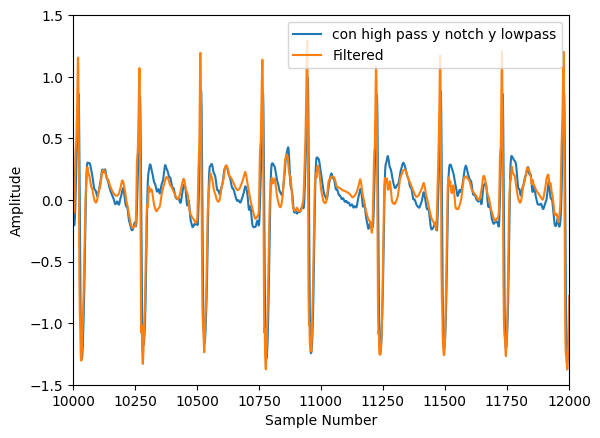

In [61]:
plt.plot(emg_filtered_signal, label='con high pass y notch y lowpass')

plt.plot(apply_high_pass_filter(ecg_filtered, 0.5, 360), label='Filtered')
plt.xlim(10000, 12000)
plt.ylim(-1.5,1.5)
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()
plt.show()